In [18]:
#basic import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#for modeling
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
import warnings

In [19]:
%pip install catboost
from catboost import CatBoostRegressor

In [20]:
df=pd.read_csv('/content/StudentsPerformance.csv')

In [21]:
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


preparing x and y

In [22]:
x=df.drop(columns=['math score'],axis=1)

In [23]:
x.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,74
1,female,group C,some college,standard,completed,90,88
2,female,group B,master's degree,standard,none,95,93
3,male,group A,associate's degree,free/reduced,none,57,44
4,male,group C,some college,standard,none,78,75


In [24]:
print("categories in 'gender' variable:    ",end=" ")
print(df['gender'].unique())


print("categories in 'race/ethnicity' variable:    ",end=" ")
print(df['race/ethnicity'].unique())


print("categories in 'parental level of education' variable:    ",end=" ")
print(df['parental level of education'].unique())



print("categories in 'lunch' variable:    ",end=" ")
print(df['lunch'].unique())

print("categories in 'test preparation course' variable:    ",end=" ")
print(df['test preparation course'].unique())

categories in 'gender' variable:     ['female' 'male']
categories in 'race/ethnicity' variable:     ['group B' 'group C' 'group A' 'group D' 'group E']
categories in 'parental level of education' variable:     ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
categories in 'lunch' variable:     ['standard' 'free/reduced']
categories in 'test preparation course' variable:     ['none' 'completed']


In [25]:
y=df['math score']

In [26]:
y.head()

,math score
0,72
1,69
2,90
3,47
4,76


In [27]:
#create column Transformer with 3 types of transformers
num_features=x.select_dtypes(exclude='object').columns
cat_features=x.select_dtypes(include='object').columns

from sklearn.preprocessing import OneHotEncoder,StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer=StandardScaler()
oh_transformer=OneHotEncoder()

preprocessor=ColumnTransformer(
    [
        ("OneHotEncoder",oh_transformer,cat_features),
        ("StandardScaler",numeric_transformer,num_features),
    ]
)

In [28]:
x=preprocessor.fit_transform(x)


In [29]:
x.shape

(1000, 19)

In [30]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)
x_train.shape,x_test.shape

((800, 19), (200, 19))

In [31]:
#create an Evalute function to give all metrics after model training
def evaluate_model(true,predicted):
  mae=mean_absolute_error(true,predicted)
  mse=mean_squared_error(true,predicted)
  rmse=np.sqrt(mean_squared_error(true,predicted))
  r2_square=r2_score(true,predicted)
  return mae,mse,mse,r2_square

In [33]:
models={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "K-Neighbors Regressor ":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Random Forest Regressor":RandomForestRegressor(),
    "XGBRegressor":XGBRegressor(),
    "CatBoosting Regressor":CatBoostRegressor(verbose=False),
    "AdaBoost Regressor":AdaBoostRegressor()
}
model_list=[]
r2_list=[]

for i in range(len(list(models))):
  model=list(models.values())[i]
  model.fit(x_train,y_train) #train model
  #Make predictions
  y_train_pred=model.predict(x_train)
  y_test_pred=model.predict(x_test)

  #Evaluate Train and Test dataset
  model_train_mae,model_train_mse,model_train_rmse,model_train_r2=evaluate_model(y_train,y_train_pred)
  model_test_mae,model_test_mse,model_test_rmse,model_test_r2=evaluate_model(y_test,y_test_pred)

  print(list(models.keys())[i])
  model_list.append(list(models.keys())[i])

  print('Model performance for Training set')
  print("- Root mean squared Error:{:.4f}".format(model_train_rmse))
  print("-Mean Absolute Error:{:.4f}".format(model_train_mae))
  print("-R2 Score:{:.4f}".format(model_train_r2))
  print('-----------------------------------')
  print('Model perormance for test set')
  print("-Root mean squared Error:{:.4f}".format(model_test_rmse))
  print("-Mean Absolute Error:{:.4f}".format(model_test_mae))
  print("-R2 Score:{:.4f}".format(model_test_r2))
  r2_list.append(model_test_r2)

  print(('='*35))
  print('\n')

Linear Regression
Model performance for Training set
- Root mean squared Error:28.3349
-Mean Absolute Error:4.2667
-R2 Score:0.8743
-----------------------------------
Model perormance for test set
-Root mean squared Error:29.0952
-Mean Absolute Error:4.2148
-R2 Score:0.8804


Lasso
Model performance for Training set
- Root mean squared Error:43.4784
-Mean Absolute Error:5.2063
-R2 Score:0.8071
-----------------------------------
Model perormance for test set
-Root mean squared Error:42.5064
-Mean Absolute Error:5.1579
-R2 Score:0.8253


Ridge
Model performance for Training set
- Root mean squared Error:28.3378
-Mean Absolute Error:4.2650
-R2 Score:0.8743
-----------------------------------
Model perormance for test set
-Root mean squared Error:29.0563
-Mean Absolute Error:4.2111
-R2 Score:0.8806


K-Neighbors Regressor 
Model performance for Training set
- Root mean squared Error:32.5070
-Mean Absolute Error:4.5070
-R2 Score:0.8558
-----------------------------------
Model perormance 

In [34]:
pd.DataFrame(list(zip(model_list,r2_list)),columns=['Model Name','R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
2,Ridge,0.880593
0,Linear Regression,0.880433
5,Random Forest Regressor,0.852100
7,CatBoosting Regressor,0.851632
8,AdaBoost Regressor,0.851538
6,XGBRegressor,0.827797
1,Lasso,0.825320
3,K-Neighbors Regressor,0.782192
4,Decision Tree,0.746485


In [35]:
lin_model=LinearRegression(fit_intercept=True)
lin_model=lin_model.fit(x_train,y_train)
y_pred = lin_model.predict(x_test)
score=r2_score(y_test,y_pred)*100
print("Accuracy of the model is %.2f"%score)

Accuracy of the model is 88.04


Text(0, 0.5, 'predicted')

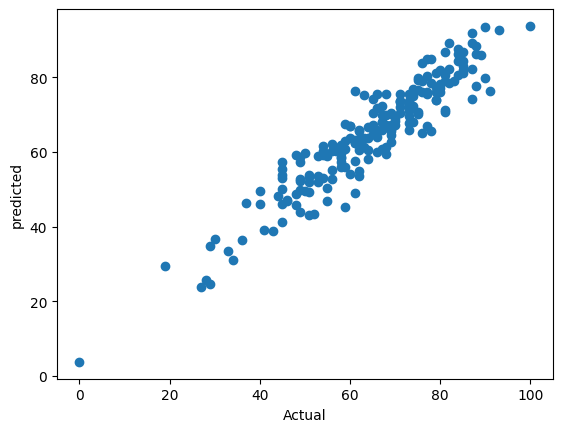

In [36]:
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('predicted')

<Axes: xlabel='math score'>

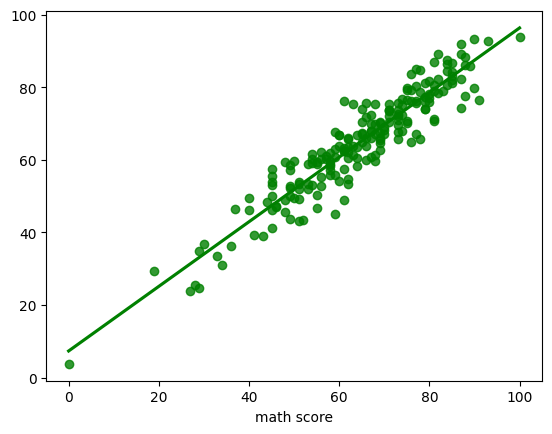

In [37]:
sns.regplot(x=y_test,y=y_pred,ci=None,color='green')

In [38]:
pred_df=pd.DataFrame({'Actual value':y_test,'predicated value':y_pred,'difference':y_test-y_pred})
pred_df

,Actual value,predicated value,difference
521,91,76.387970,14.612030
737,53,58.885970,-5.885970
740,80,76.990265,3.009735
660,74,76.851804,-2.851804
411,84,87.627378,-3.627378
...,...,...,...
408,52,43.409149,8.590851
332,62,62.152214,-0.152214
208,74,67.888395,6.111605
613,65,67.022287,-2.022287
